In [ ]:
#in this file I want to take in a hypnogram and an HRDf
#and return an HRDf that just has samples during sleep times

In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno, getWorkingHRDfParquet, getHRGroups, graphHypnoandHRDate
import pandas as pd

appleHypnoDf = getWorkingHypnoDfParquet("apple").drop(["creationDate", "sourceVersion"], axis=1)
appleHypnoDf['startDate'] = appleHypnoDf.index

appleHRDf = getWorkingHRDfParquet('apple')

fitbitHypnoDf = getWorkingHypnoDfParquet("fitbit")
fitbitHypnoDf['startDate'] = fitbitHypnoDf.index

fitbitHRDf = getWorkingHRDfParquet('fitbit')


In [41]:
# regroup hypno with awake/ no data, or sleep stages
isAsleepDf = regroupHypno(appleHypnoDf, [1,2,3])
sleepTimesDf = isAsleepDf[isAsleepDf['value'] == 1]
awakeTimesDf = isAsleepDf[isAsleepDf['value'] == 0]
print(len(sleepTimesDf))

6841


In [20]:
# query the HRDf for the times during the section
def getHRsForTimePeriods(times, HRDf):
    mask = pd.Series([False] * len(HRDf), index=HRDf.index)
    
    for start, end in times[['startDate', 'endDate']].values.tolist():
        # Use binary search to find the positions of the start and end times
        start_idx = HRDf.index.searchsorted(start, side='left')  # Start index (left inclusive)
        end_idx = HRDf.index.searchsorted(end, side='right')     # End index (right exclusive)

        # Set the mask to True for the rows between the start and end positions
        mask.iloc[start_idx:end_idx] = True    

    return HRDf[mask]

In [22]:
# takes 5m 2s
# with binary search takes 1s
sleepHRs = getHRsForTimePeriods(sleepTimesDf, fitbitHRDf)

In [42]:
awakeHRs = getHRsForTimePeriods(awakeTimesDf, fitbitHRDf)

In [7]:
sorted(list(set(sleepHRs.index.date)))[-5:]

[datetime.date(2024, 8, 22),
 datetime.date(2024, 8, 23),
 datetime.date(2024, 8, 24),
 datetime.date(2024, 8, 25),
 datetime.date(2024, 8, 27)]

In [46]:
def printHRMetrics(HRDf):
    print(f"mean HR is {HRDf['value'].mean()}")
    print(f"median HR is {HRDf['value'].median()}")
    print(f"min HR is {min(HRDf['value'])}")
    print(f"max HR is {max(HRDf['value'])}")
    HRDf['value'].plot.hist(bins=60)

In [50]:
def plot2HRGroups(HRDf1, HRDf2, name1, name2):
    bins = [x for x in range(30,221, (220-30)//40)]
    ax = HRDf1.value.plot.hist(bins=bins, xlim=(30,200), alpha=0.5, label=name1)
    ax.hist(HRDf2.value, bins=bins, alpha=0.5, color="g", label=name2)
    ax.set_xlabel("BPM")
    ax.set_title("Comparison between " + name1 + " and " + name2)
    ax.axvline(HRDf1.value.mean(), color='b', linestyle='dashed', linewidth=1)
    ax.axvline(HRDf2.value.mean(), color='darkgreen', linestyle='dashed', linewidth=1)
    ax.legend(loc='upper right') 
    ax.set_xlim(30,220)

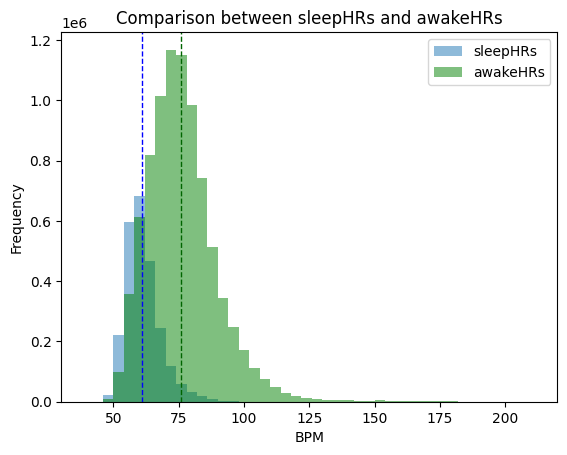

In [51]:
plot2HRGroups(sleepHRs, awakeHRs, 'sleepHRs', 'awakeHRs')

mean HR is 60.814925035680474
median HR is 60.0
min HR is 40
max HR is 162


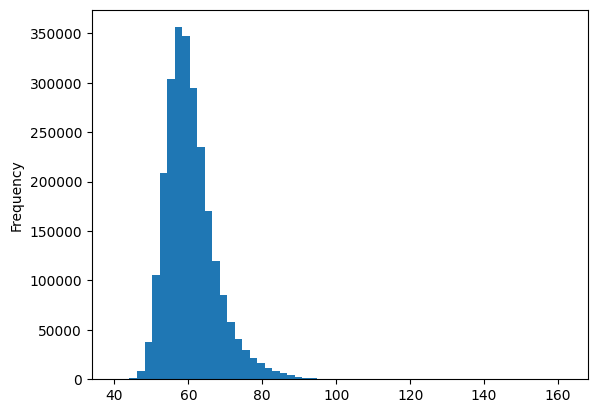

In [47]:
printHRMetrics(sleepHRs)


mean HR is 75.6908408944474
median HR is 74.0
min HR is 36
max HR is 209


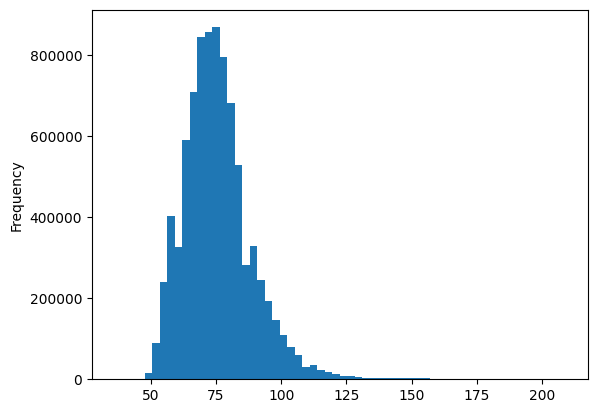

In [48]:
printHRMetrics(awakeHRs)

the day has 3189 samples for apple in 1 groups


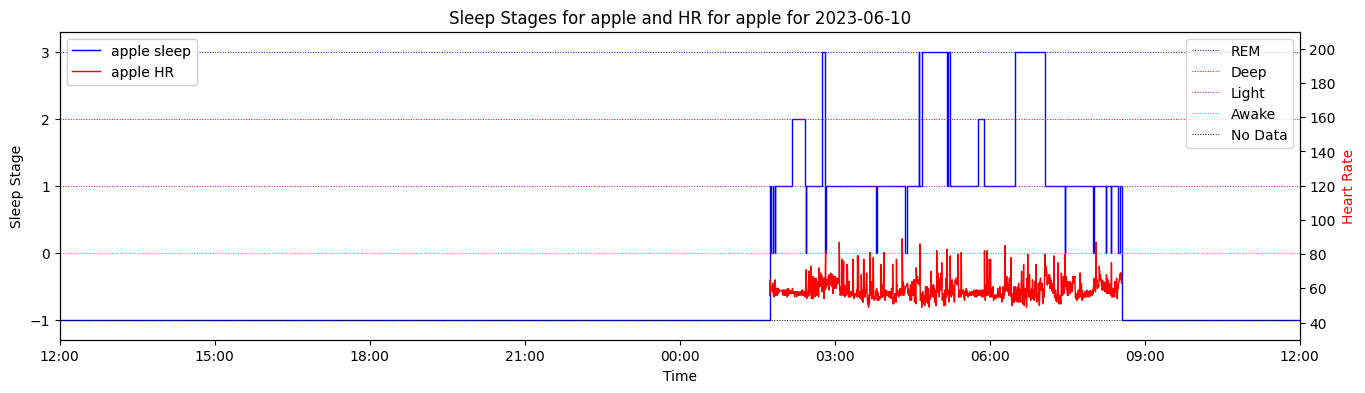

/home/chowder/Documents/dataImport/utils.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRDf["sampleDT"] = HRDf.index


the day has 3695 samples for apple in 2 groups


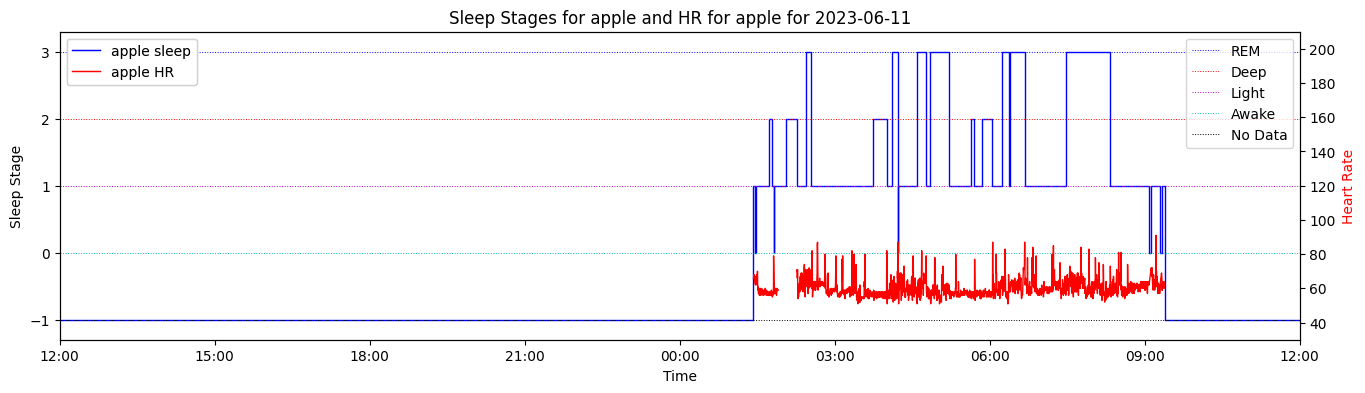

/home/chowder/Documents/dataImport/utils.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRDf["sampleDT"] = HRDf.index


the day has 4022 samples for apple in 1 groups


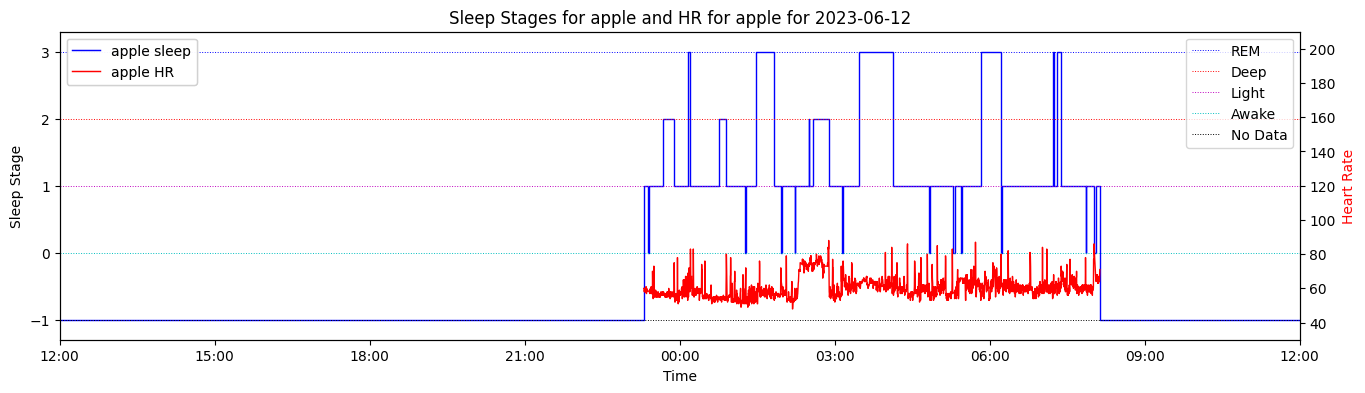

the day has 0 samples for apple in 0 groups


/home/chowder/Documents/dataImport/utils.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRDf["sampleDT"] = HRDf.index


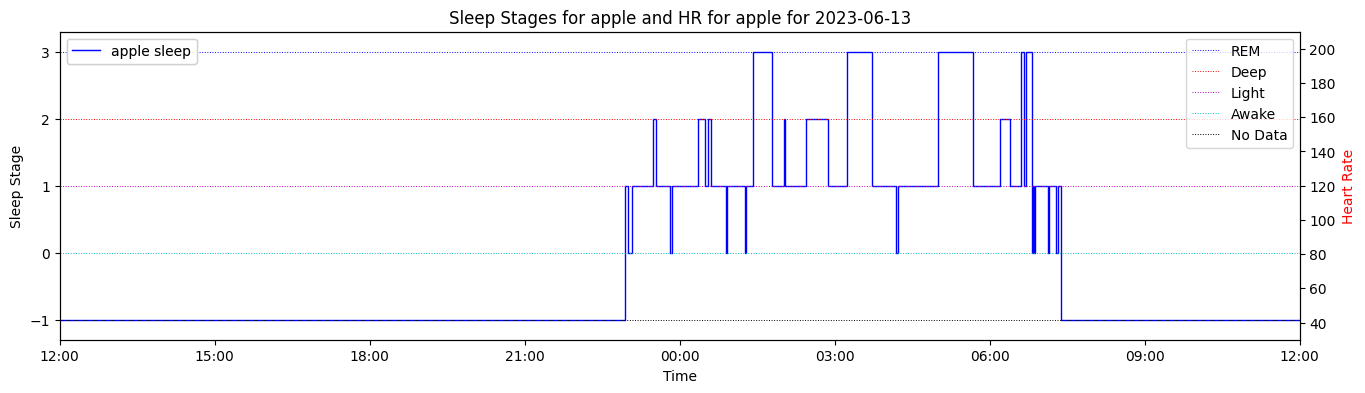

the day has 3409 samples for apple in 1 groups


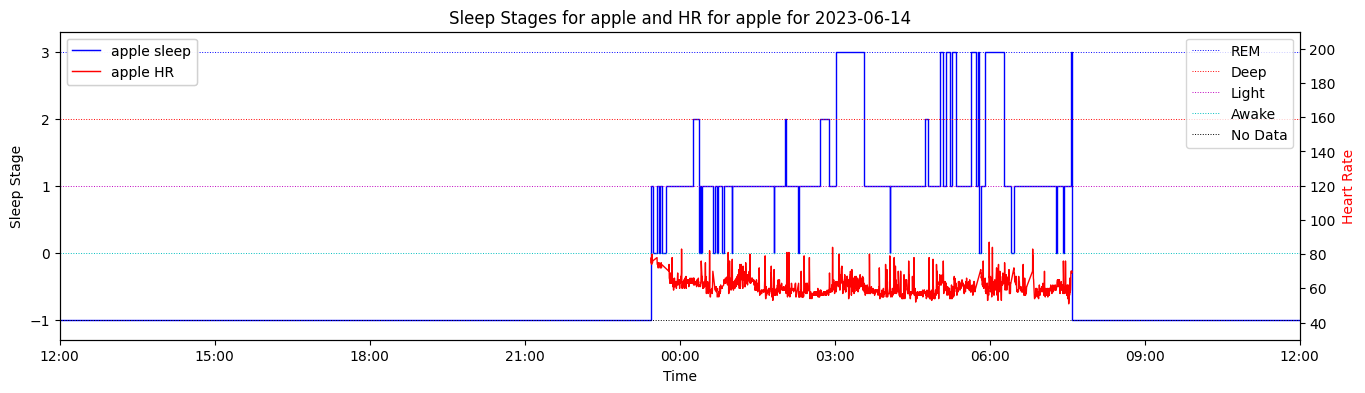

/home/chowder/Documents/dataImport/utils.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRDf["sampleDT"] = HRDf.index


the day has 4312 samples for apple in 2 groups


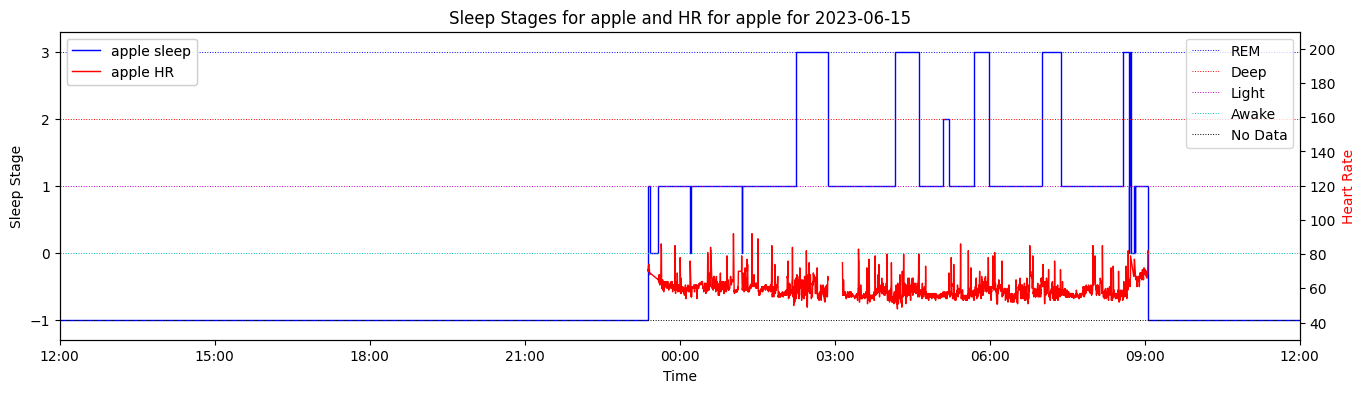

the day has 0 samples for apple in 0 groups


/home/chowder/Documents/dataImport/utils.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRDf["sampleDT"] = HRDf.index


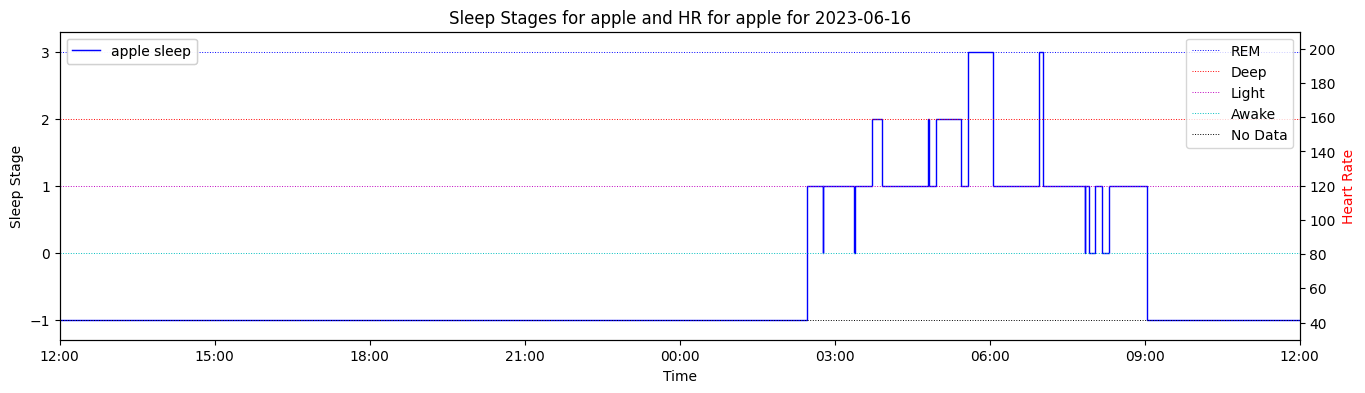

In [23]:
from datetime import date, timedelta
for i in range(7):
    graphHypnoandHRDate(appleHypnoDf, sleepHRs, date(2023,6,10) + timedelta(days=i), 'apple', 'apple')